# generating

- 베이즈에서 랜덤분포를 생성하는것도 굉장히 중요합니다.
- numpy 와 scipy 두가지가 있습니다만, 저는 scipy 를 선호합니다.

- loc : 분포의 '위치' 를 나타냅니다. 
- scale : 분포의 스케일을 나타냅니다. (얼마나 변하는지), 즉 작을수록 뾰족하고 클수록 평평합니다.
- rate : scale 의 역수입니다. 즉 클수록 뾰족합니다.
- shape : scale 과 rate 가 둘다 섞인 형태입니다. 


- 우리가 헷갈리는 부분은 대부분 rate 와 scale 파라미터를 얘기할때에 생기는 것입니다. 

In [2]:
import scipy
import scipy.stats
import numpy as np
import scipy
import scipy.stats as st

## Binomial

- p : 1이 나올 확률

In [25]:
sample = scipy.stats.bernoulli.rvs(p = 0.1,
                                   size=100,
                                   random_state = 300)
sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Beta

- 아래의 경우는 베타분포의 경우에 Sample 을 Generating 하는것입니다. 
- a,b 는 정의된 그대로입니다.

In [7]:
sample = scipy.stats.beta.rvs(a=2
                             ,b=3
                             ,size = 10)
sample

array([0.73951361, 0.48879831, 0.1110817 , 0.43643264, 0.3090312 ,
       0.74623878, 0.34533823, 0.23442642, 0.07970602, 0.91560427])

## Normal

- loc : 평균
- scale : 표준편차 

In [14]:
# 평균 1 , 분산 1 일  Normal 생성
sample = scipy.stats.norm.rvs(loc = 0, 
                              scale = 10,
                              size = 10000
                             )

In [18]:
print(np.mean(sample), np.var(sample) )

0.037893222539599127 98.03479295571574


## Gamma

<img align="left" src="./Bayes/1_1.png">


- a : shape parameter
- scale paramter 를 사용한다. 우리가 통상적으로 사용하는건 rate 이므로 주의

$\Gamma(x_1,a) + \Gamma(x_2,a) = \Gamma(x_1 + x_2 , a)$

In [27]:
sample = scipy.stats.gamma.rvs(a = 2, 
                              scale = 10,
                              size = 10000
                              )

In [28]:
print(np.mean(sample), np.var(sample) )

19.82730220107945 200.45275093611232


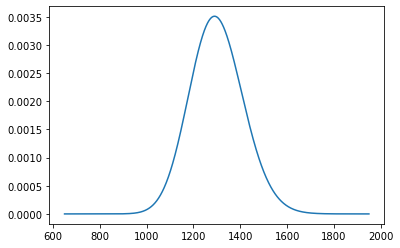

In [30]:
import matplotlib.pyplot as plt
a = 130
scale= 10
mean = a*scale
x = np.arange(mean*0.5, mean * 1.5, mean/1000) # 범위 정하기
y = st.gamma.pdf(x,a = a, scale= scale) 
plt.plot(x, y) ; 

### 직관적인 Plot

- 평균, 표준편차를 정하게 되면, 2개의 Parameter가 자동적으로 정해지게 된다. 

In [174]:
import matplotlib.pyplot as plt
x = np.arange(0.01, 200, 0.01) # 범위 정하기
mean , sd = ( 142 , 142 ) # 3평균 , 표준편차 
a, scale = (mean**2 / sd **2, sd**2 / mean) ; (a,scale)

(1.0, 142.0)

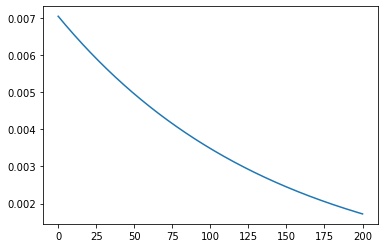

In [175]:
y = st.gamma.pdf(x,a = a, scale= scale) 
plt.plot(x, y) ; 

## inv-gamma

<img align="left" src="./Bayes/1_3.png">


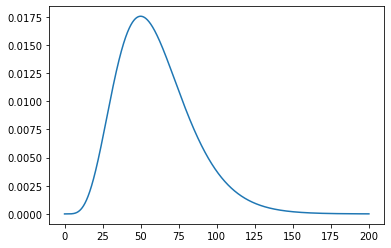

In [177]:
import matplotlib.pyplot as plt
x = np.arange(0.01, 200, 0.01) # 범위 정하기
y = st.gamma.pdf(x,a = 6, scale= 10) 
plt.plot(x, y) ; 

In [176]:
sample = scipy.stats.invgamma.rvs(a = 2, 
                                 scale = 10,
                                 size = 10000
                              )

## Exp

<img align="left" src="./Bayes/1_2.png">


- scale 을 쓴다. 
- 이 경우 위와 같이 mean = scale 이 되고, variance 는 scale^2 이 됨을 명심ㅎ자. 
- $\Gamma(1,scale = \theta) = exp(\theta)$

In [42]:
sample = scipy.stats.expon.rvs(scale = 10,
                               size = 10000
                              )

In [43]:
print(np.mean(sample),np.var(sample))

9.913730297588888 99.80023996758383


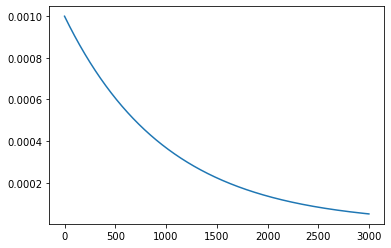

In [9]:
scale = 1000
import matplotlib.pyplot as plt
x = np.arange(0.01, scale*3 , scale/1000) # 범위 정하기
y = st.expon.pdf(x,scale=scale) # 평균이 10인 Exp Generating
plt.plot(x, y) ; 

In [ ]:
mean , sd = ( 10 , 6 ) # 평균 , 표준편차 
a, scale = (mean**2 / sd **2, sd**2 / mean) ; (a,scale)

계산식 : https://wiki.analytica.com/index.php?title=Gamma_distribution 

In [117]:
# 아.. 문제점은 딱 그거네
# 분산이 평균과 딱 고정되어버린다는거...

A_m , A_s = ( 10 , 6 ) # 평균 , 표준편차 
B_m , B_s = ( 10 , 6 ) # 평균 , 표준편차 
N = 100
a_a, a_scale = (A_m**2 / A_s **2, A_s**2 / A_m ) 
b_a, b_scale = (B_m**2 / B_s **2, B_s**2 / B_m) 

lis_a = []
lis_b = []
for _ in range(N):
    a_sam = scipy.stats.gamma.rvs(a = a_a , scale = a_scale,size = 10000)
    a_mean = np.mean(a_sam)
    lis_a.append(a_mean)
    b_sam = scipy.stats.gamma.rvs(a = b_a , scale = b_scale,size = 10000)
    b_mean = np.mean(b_sam)
    lis_b.append(b_mean)

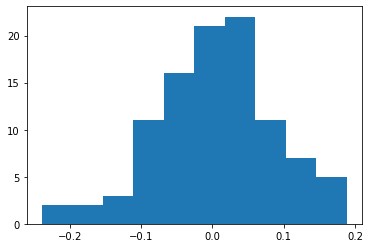

In [120]:
plt.hist(np.array(lis_a) - np.array(lis_b)) ; 

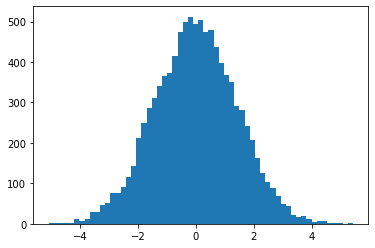

In [129]:
A_m , A_s = ( 100 , 100 ) # 평균 , 표준편차 
B_m , B_s = ( 100 , 100 ) # 평균 , 표준편차 
N = 10000
a_a, a_scale = (A_m**2 / A_s **2, A_s**2 / A_m ) 
b_a, b_scale = (B_m**2 / B_s **2, B_s**2 / B_m) 

lis_a = []
lis_b = []
for _ in range(N):
    a_sam = scipy.stats.gamma.rvs(a = a_a , scale = a_scale,size = 10000)
    a_mean = np.mean(a_sam)
    lis_a.append(a_mean)
    b_sam = scipy.stats.gamma.rvs(a = b_a , scale = b_scale,size = 10000)
    b_mean = np.mean(b_sam)
    lis_b.append(b_mean)
plt.hist(np.array(lis_a) - np.array(lis_b),bins='auto') ; 

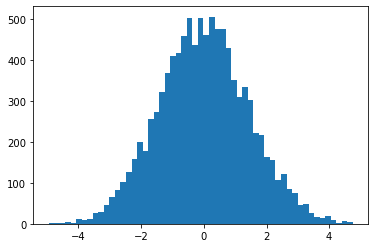

In [128]:
# exp 분포는 평균 , 표준편차가 같다.
A_m , A_s = ( 100 , 100 ) # 평균 , 표준편차 
B_m , B_s = ( 100 , 100 ) # 평균 , 표준편차 
N = 10000
a_scale = A_m 
b_scale = B_m

lis_a = []
lis_b = []
for _ in range(N):
    a_sam = scipy.stats.expon.rvs(scale = a_scale,size = 10000)
    a_mean = np.mean(a_sam)
    lis_a.append(a_mean)
    b_sam = scipy.stats.expon.rvs(scale = b_scale,size = 10000)
    b_mean = np.mean(b_sam)
    lis_b.append(b_mean)
plt.hist(np.array(lis_a) - np.array(lis_b),bins='auto') ; 

# Plot

## Plot pdf

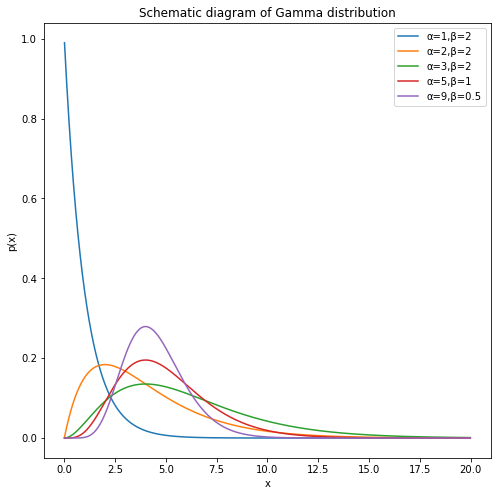

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

# Set canvas
plt.figure(figsize=(8, 8))  # Determine the drawing area size
x = np.arange(0.01, 20, 0.01) # 범위 정하기()

# 분포 생성하기
y1 = st.gamma.pdf(x, 1, scale = 1)  # "α=1,β=2"
y2 = st.gamma.pdf(x, 2, scale=2)  # "α=2,β=2"
y3 = st.gamma.pdf(x, 3, scale=2)  # "α=3,β=2"
y4 = st.gamma.pdf(x, 5, scale=1)  # "α=5,β=1"
y5 = st.gamma.pdf(x, 9, scale=0.5)  # "α=9,β=0.5"

# 겹쳐 그리기
plt.plot(x, y1, label="α=1,β=2")
plt.plot(x, y2, label="α=2,β=2")
plt.plot(x, y3, label="α=3,β=2")
plt.plot(x, y4, label="α=5,β=1")
plt.plot(x, y5, label="α=9,β=0.5")

# Set the axis title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Schematic diagram of Gamma distribution")
plt.legend(loc="best")
plt.show()

## Plot many pdf

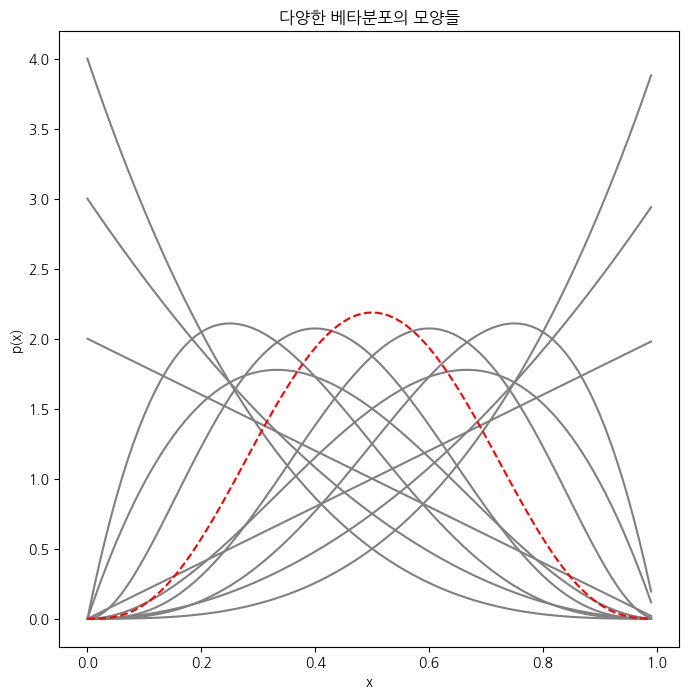

In [166]:
# Set canvas
plt.figure(figsize=(8, 8))  # Determine the drawing area size
x = np.arange(0,1, 0.01) # 범위 정하기()
# 분포 생성하기
for i in range(1,5):
    for j in range(1,5):
        if i == 4 and j == 4 :
            y = st.beta.pdf(x, a= i, b=j)
            plt.plot(x,y,c='r',linestyle = '--')
            continue
        if i != j:
            y = st.beta.pdf(x, a= i, b=j)  # "α=1,β=2"
            plt.plot(x, y, c = 'gray')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("다양한 베타분포의 모양들")
plt.show()

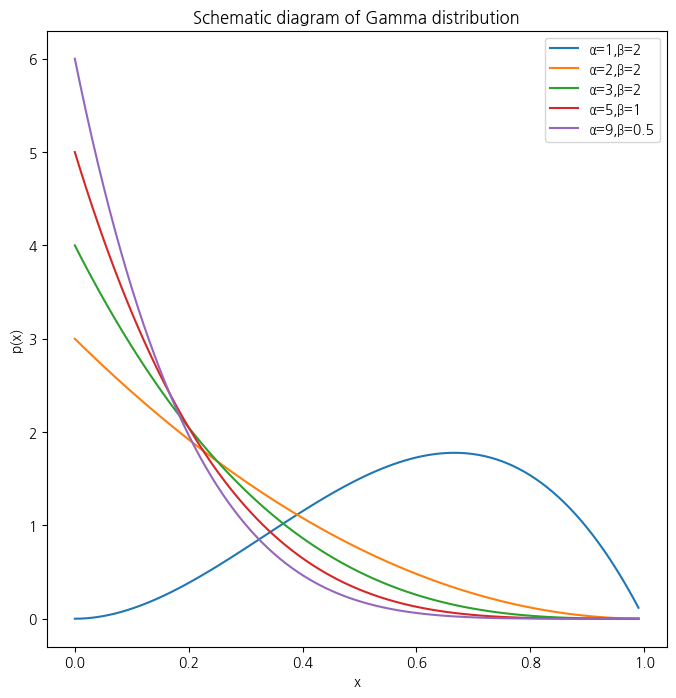

In [135]:
y1 = st.beta.pdf(x, a= 1, b=2)  # "α=1,β=2"
y2 = st.beta.pdf(x, a= 1, b=3)  # "α=2,β=2"
y3 = st.beta.pdf(x, a= 1, b=4)  # "α=1,β=2"
y4 = st.beta.pdf(x, a= 1, b=5)  # "α=2,β=2"
y5 = st.beta.pdf(x, a= 1, b=6)  # "α=1,β=2"

# 겹쳐 그리기
plt.plot(x, y1, label="α=1,β=2")
plt.plot(x, y2, label="α=2,β=2")
plt.plot(x, y3, label="α=3,β=2")
plt.plot(x, y4, label="α=5,β=1")
plt.plot(x, y5, label="α=9,β=0.5")

# Set the axis title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Schematic diagram of Gamma distribution")
plt.legend(loc="best")
plt.show()

## Plot Likelihood

- Likelihood 를 정의하는것이 중요하다. 
- 그리고자 하는 모수를 theta 로 정의하자. 

In [85]:
# Bernouli 데이터에 대한 Likelihood 를 정의한다. 
# H : Head
# T : Tail 
def likelihood(theta,H,T): 
    return theta**H*(1-theta)**T

- 어디까지 그릴지 범위를 지정한다. 

In [87]:
xlim = np.linspace(0, 1, 300)

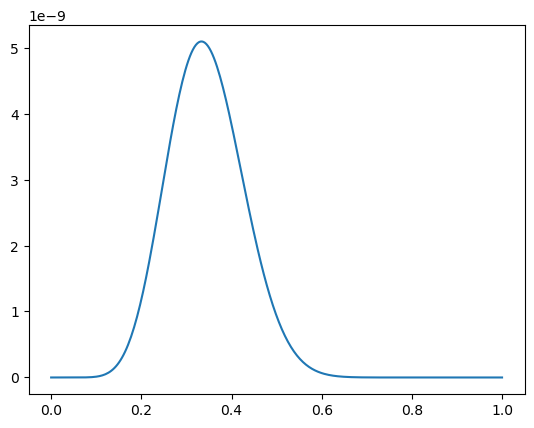

In [91]:
plt.plot(xlim,likelihood(xlim,H = 10, T = 20))

## Prior + Likelihood + Posterior

In [170]:
24/ 32

0.75

In [ ]:
24 
4 + 20 - 16 


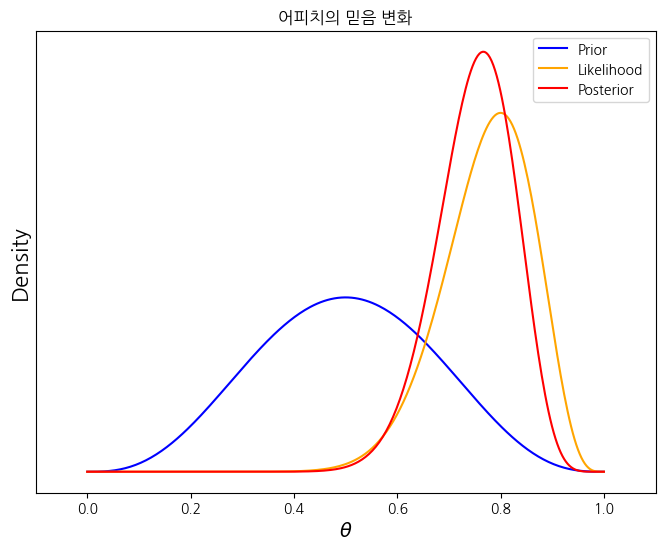

In [168]:
# Bernouli Data
n = 20 # 총 던진 횟수
y = 16 # 앞면이 나온 수

# Bernouli Likelihood
def likelihood(theta, n, y): 
    return theta**y*(1-theta)**(n-y)

# 설정된 모수에 대한 범위설정 
lim = np.linspace(0, 1, 300)

# Prior
a0 = 4
b0 = 4
prior = st.beta(a= 4, b=4)

# Posterior (conjugate 에 대한 업데이트)
post = st.beta(a=a0+n, b=b0+(n-y)) 

plt.figure(figsize=(8, 6))

# prior,likelihood,posterior 그리기
plt.plot(lim, prior.pdf(thetas), label='Prior', c='blue')
# Likelihood 앞에 값을 곱해야, Scale 을 어느정도 조절 가능하다. 그래서 10*5.5 를 곱하였다. 
plt.plot(lim, (10**5)*likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(lim, post.pdf(thetas), label='Posterior', c='red')

# 세부조절
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.yticks([])
plt.legend();
plt.title('어피치의 믿음 변화')
plt.show()

![img](./Pictures/Bayes1.png)

In [101]:
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

- 베타 분포에 대한 통계량값

![img](./Pictures/Bayes2.png)

![img](./Pictures/Bayes3.png)

- 위와 같이 기댓값이 정해진다. 

# 1번 그림

##### Set canvas
plt.figure(figsize=(8, 8))  # Determine the drawing area size
x = np.arange(0.01, 10, 0.01) # 범위 정하기()

# 분포 생성하기
y1 = st.expon.pdf(x, scale=1)  # "α=1,β=2"
y2 = st.expon.pdf(x, scale=2)  # "α=2,β=2"
y3 = st.expon.pdf(x, scale=3)  # "α=3,β=2"
y4 = st.expon.pdf(x, scale=4)  # "α=5,β=1"
y5 = st.expon.pdf(x, scale=5)  # "α=9,β=0.5"

# 겹쳐 그리기
plt.plot(x, y1, label="θ=1")
plt.plot(x, y2, label="θ=2")
plt.plot(x, y3, label="θ=3")
plt.plot(x, y4, label="θ=4")
plt.plot(x, y5, label="θ=5")

# Set the axis title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("감마 분포의 scale 변화")
plt.legend(loc="best")
plt.show()

#